# Convolutional Neural Network

* MNIST data
* Convolution Layer
* Pooling Layer

## 1. Settings

### 1-1 Import required libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

### Torchvision? [pypi.org](https://pypi.org/project/torchvision/0.1.8/)

1. vision.datasets : Data loaders for popular vision datasets
2. vision.models : Definitions for popular model architectures, such as AlexNet, VGG, and ResNet and pre-trained models.
3. vision.transforms : Common image transformations such as random crop, rotations etc.
4. vision.utils : Useful stuff such as saving tensor (3 x H x W) as image to disk, given a mini-batch creating a grid of images, etc.

## 2. Data

### 2-1 Download Data

In [6]:
mnist_train = dset.MNIST("./",train = True, transform = transforms.ToTensor(), target_transform = None, download=True)

### MNIST [pypi.org](https://pypi.org/project/torchvision/0.1.8/#mnist)

1. dset.MNIST(root, train=True, transform=None, target_transform=None, download=False)

2. root: root directory of dataset where processed/training.pt and processed/test.pt exist

3. train: True - use training set, False - use test set.

4. transform: transform to apply to input images

5. target_transform: transform to apply to targets (class labels)

6. download: whether to download the MNIST data



### 2-2 Item

In [14]:
print(mnist_train)

# dataset.__getitem__(idx)
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

#dataset[idx]
image, label = mnist_train[0]
print(image.size(), label)

torch.Size([1, 28, 28]) tensor(5)
torch.Size([1, 28, 28]) tensor(5)


In [19]:
#튜플 형태로 (MNIST Data, Label) 반환함 
mnist_train[0]

(tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.000

In [28]:
mnist_train[0][0]

tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0

### 2-3 Length

In [23]:
# dataset.__len__()
print(mnist_train.__len__())

# len(dataset)
len(mnist_train)

60000


60000

### 2-4 Show Image

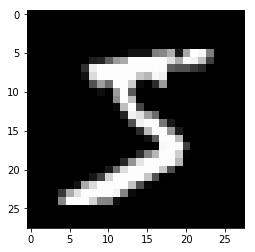

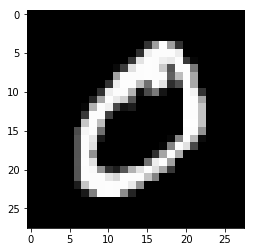

In [36]:
import numpy as np
for i in range(2):
    img = mnist_train[i][0].numpy()
    plt.imshow(img[0], cmap='gray')
    plt.show()